In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np 
from pathlib import Path
from hypnose_analysis.utils.metrics_utils import *
from hypnose_analysis.utils.visualization_utils import *
#from utils.visualization_utils import _load_tracking_and_behavior
import harp
from ipywidgets import widgets
from IPython.display import display
import moviepy
%matplotlib widget

# 1. Metrics Visualization

In [4]:
subjid = 40
dates = (20251118, 20251231)

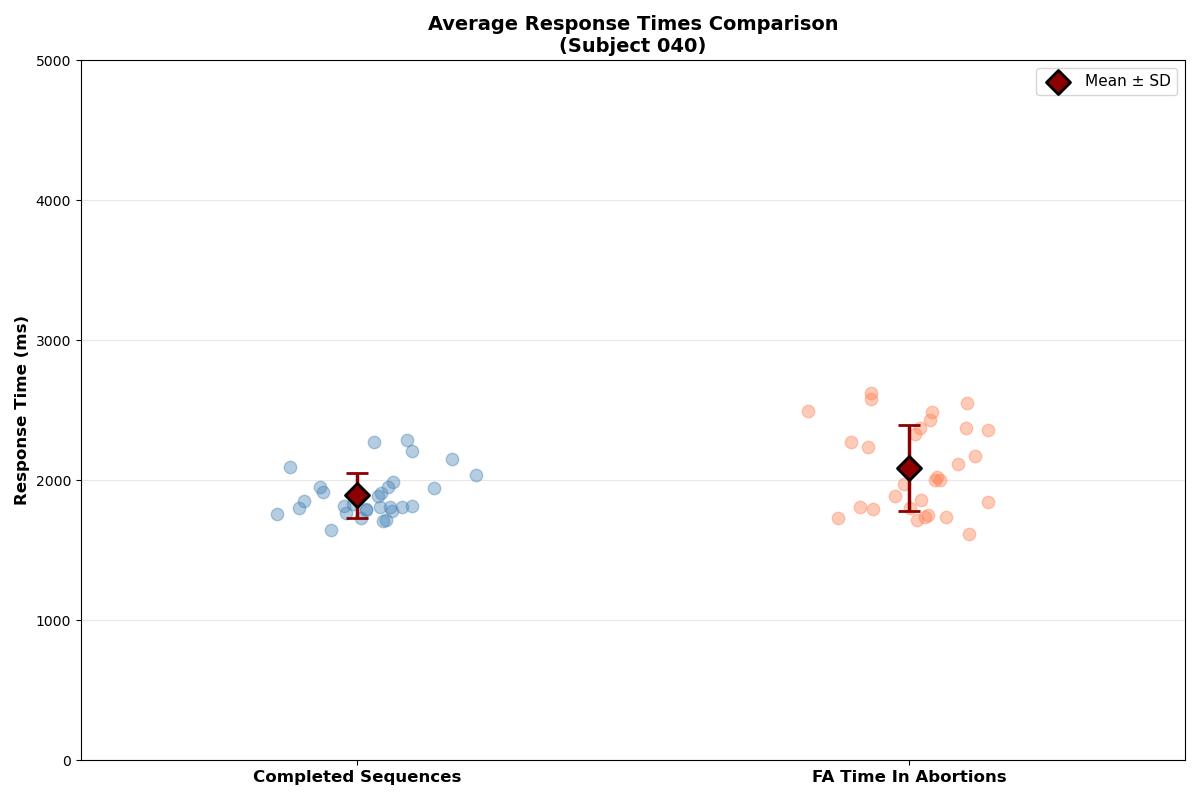

In [ ]:
# Plots response times for completes trials vs early choice trials as boxplots
fig, ax = plot_response_times_completed_vs_fa(subjid, dates=dates, y_limit=5000)

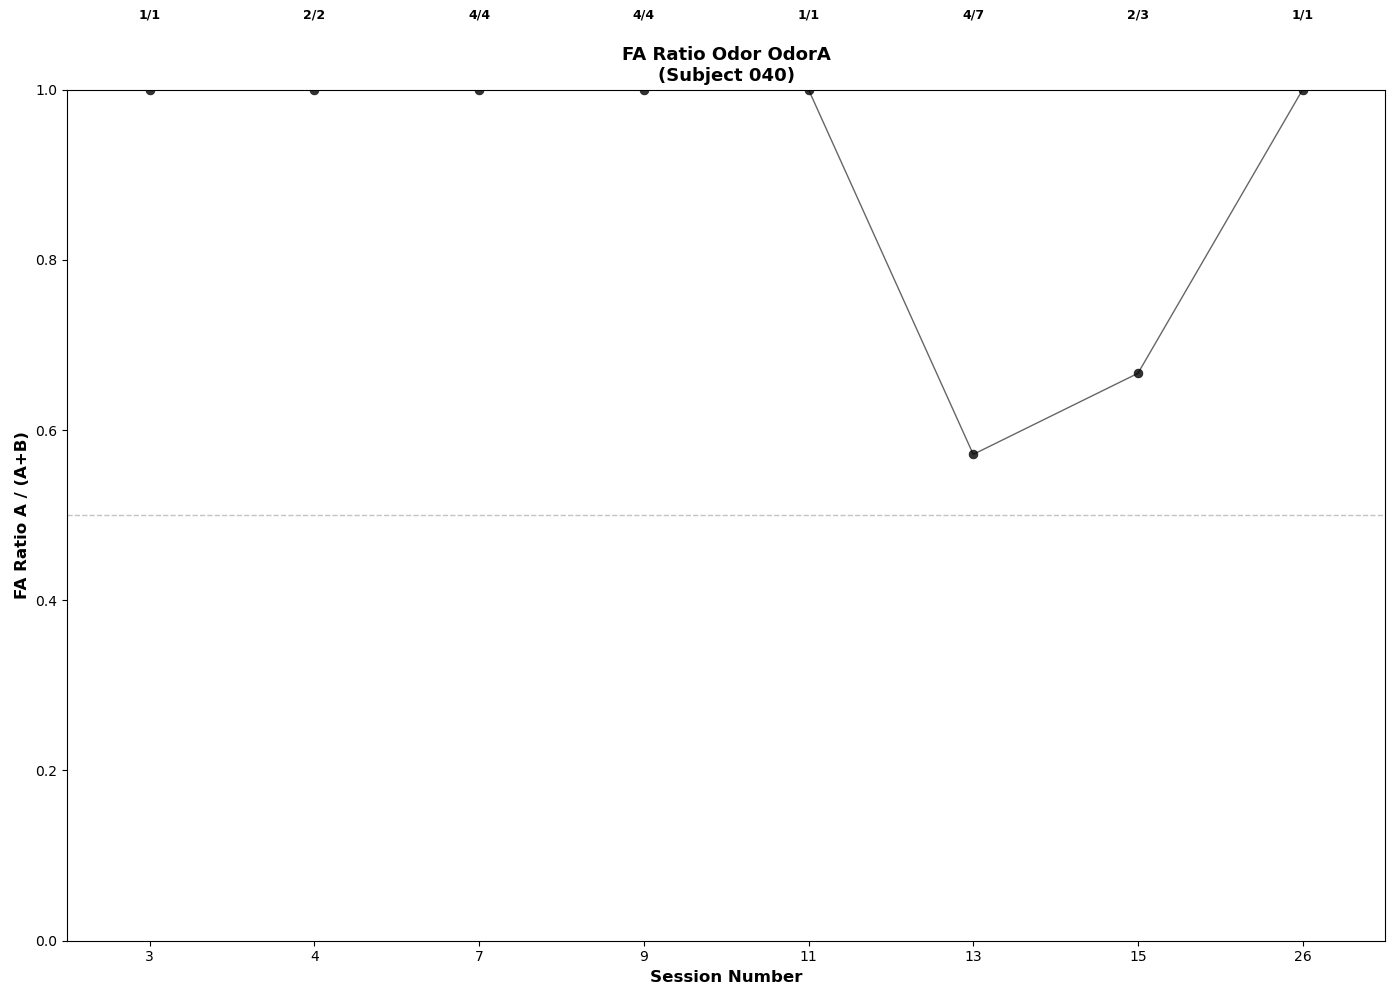

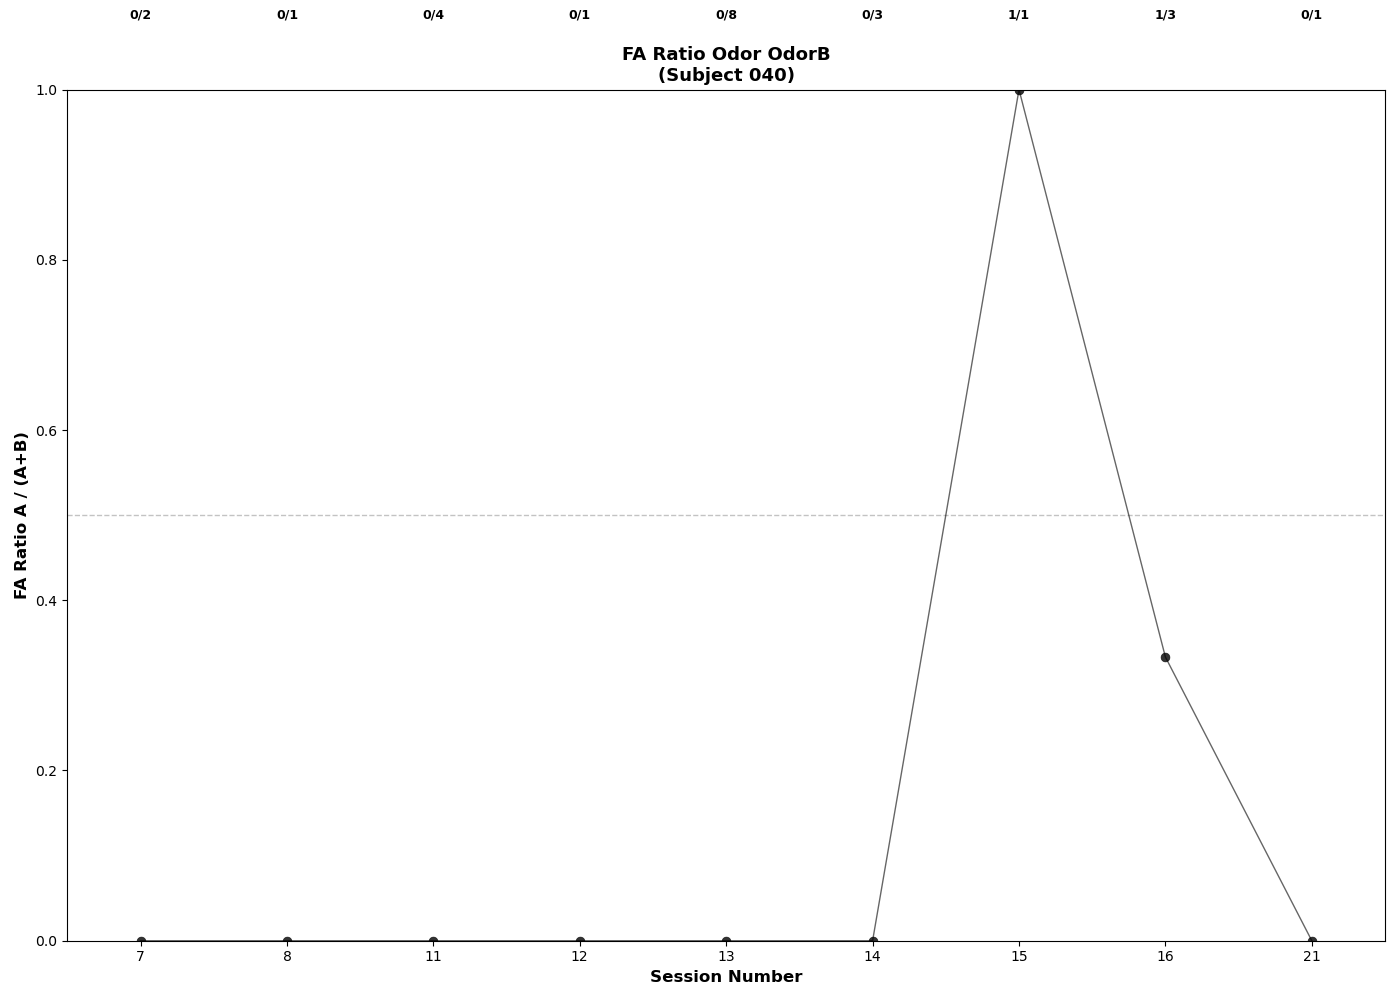

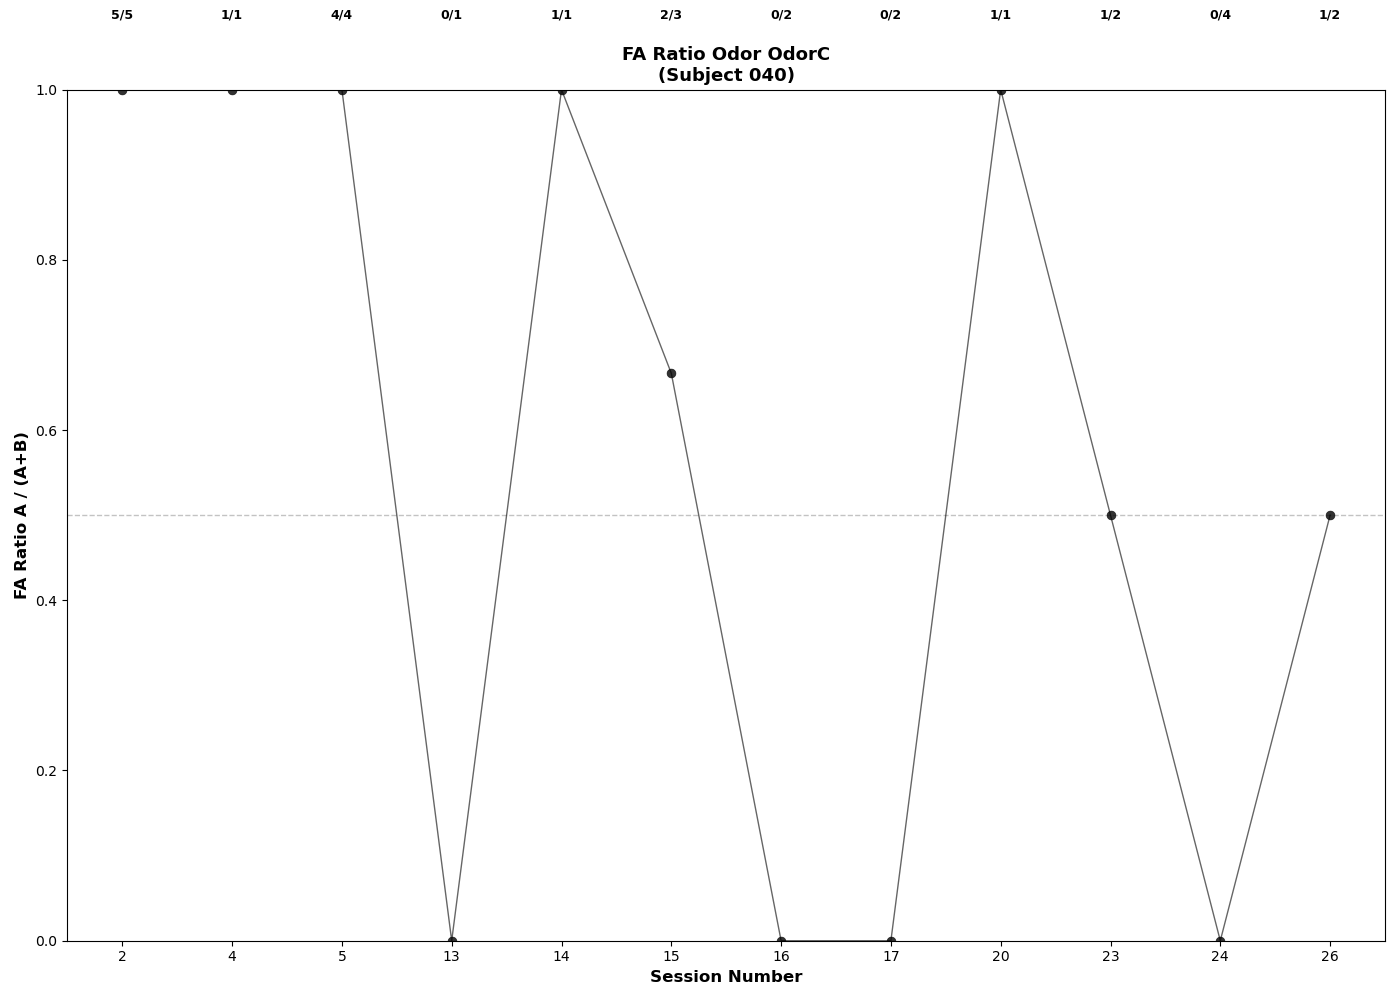

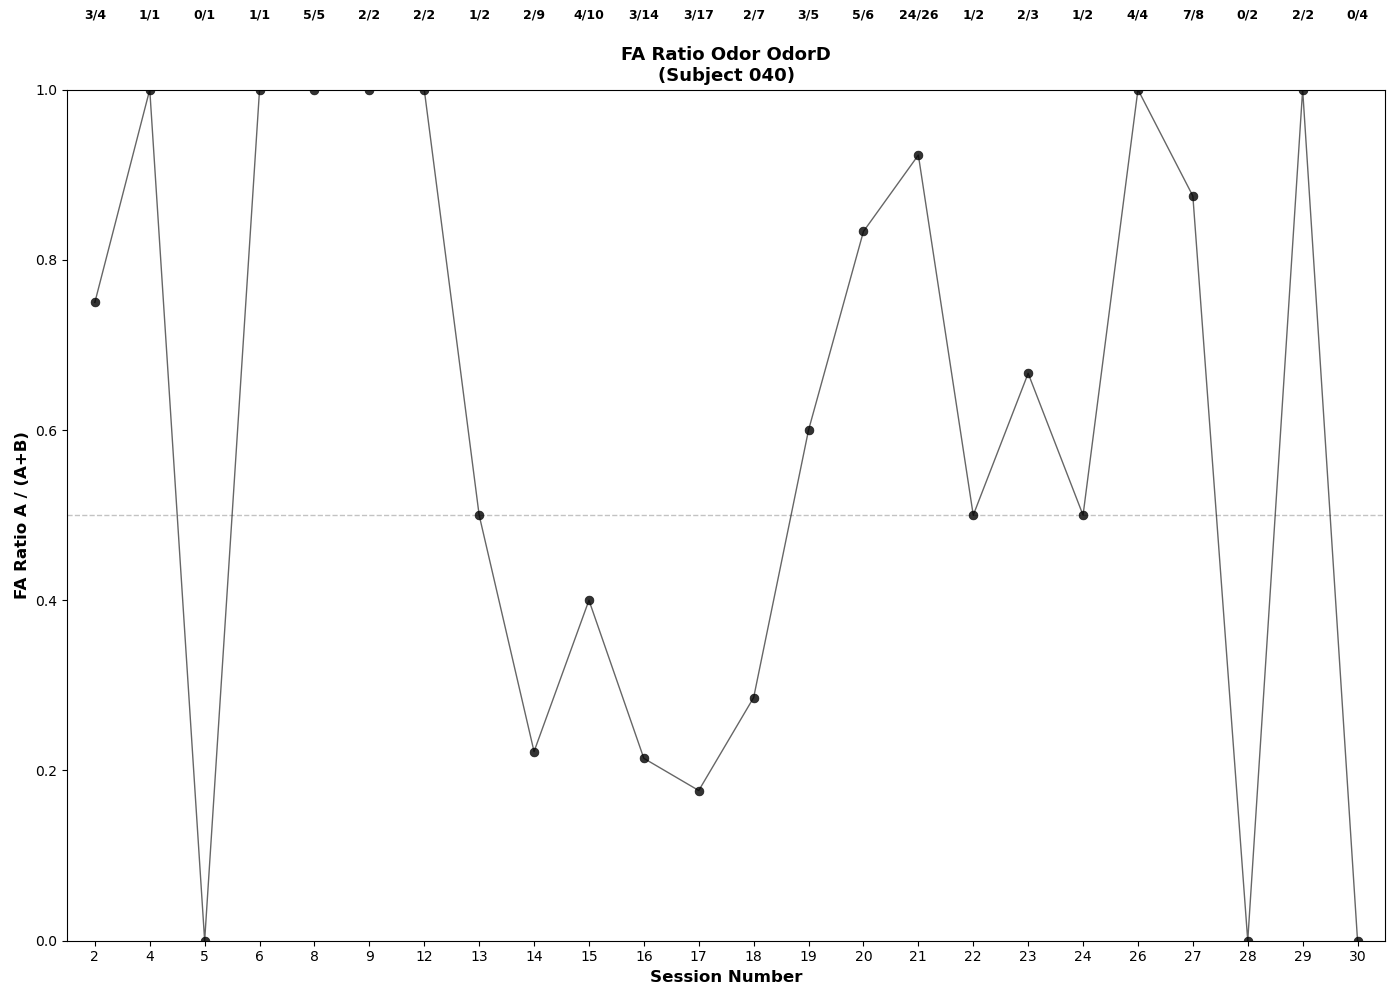

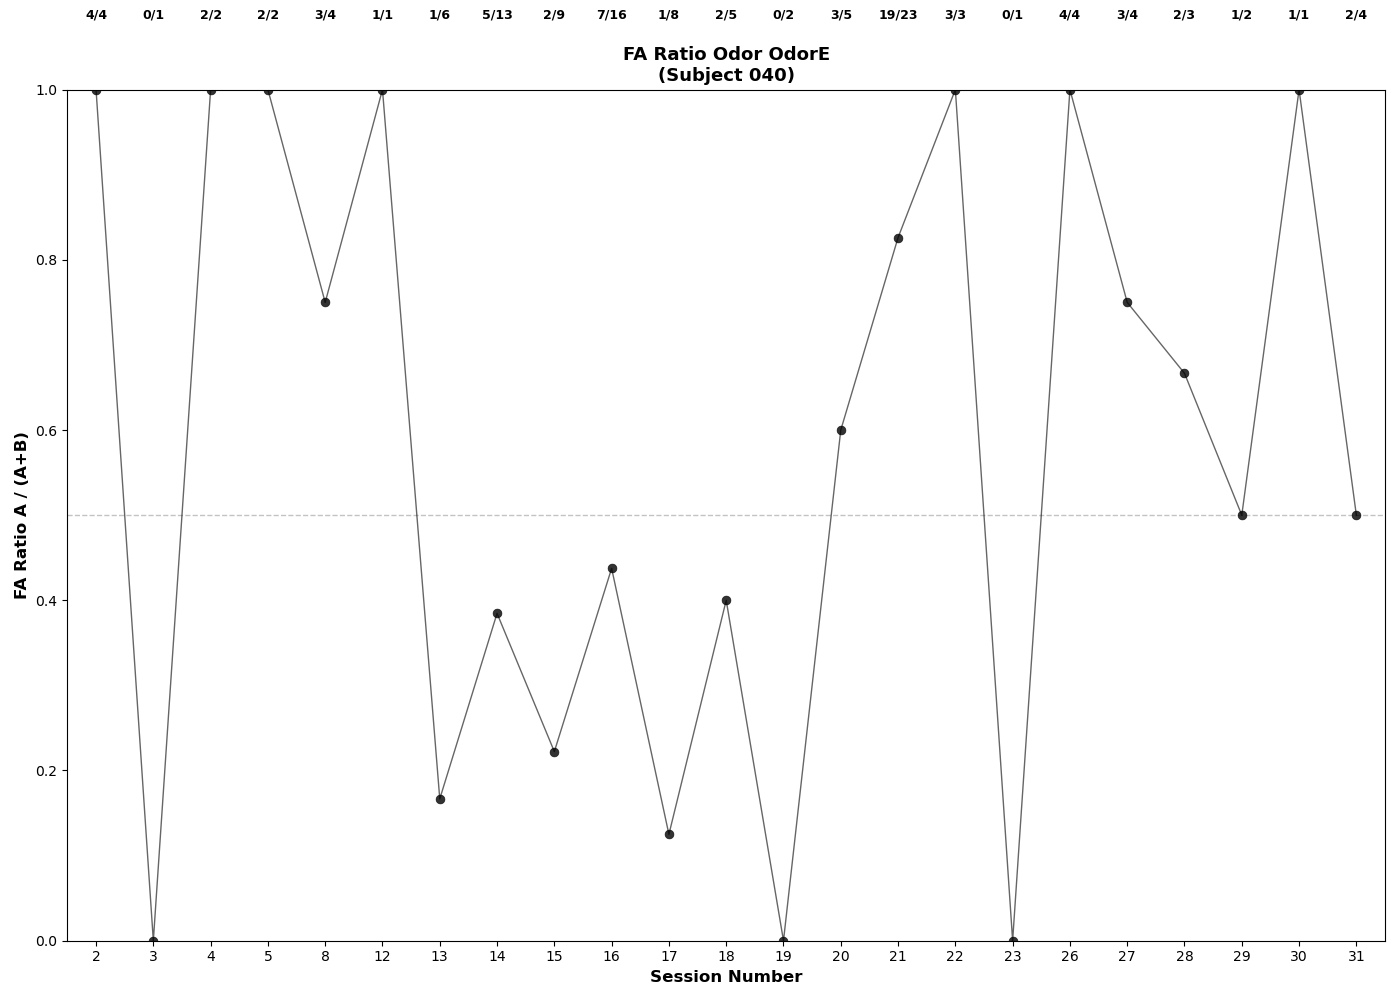

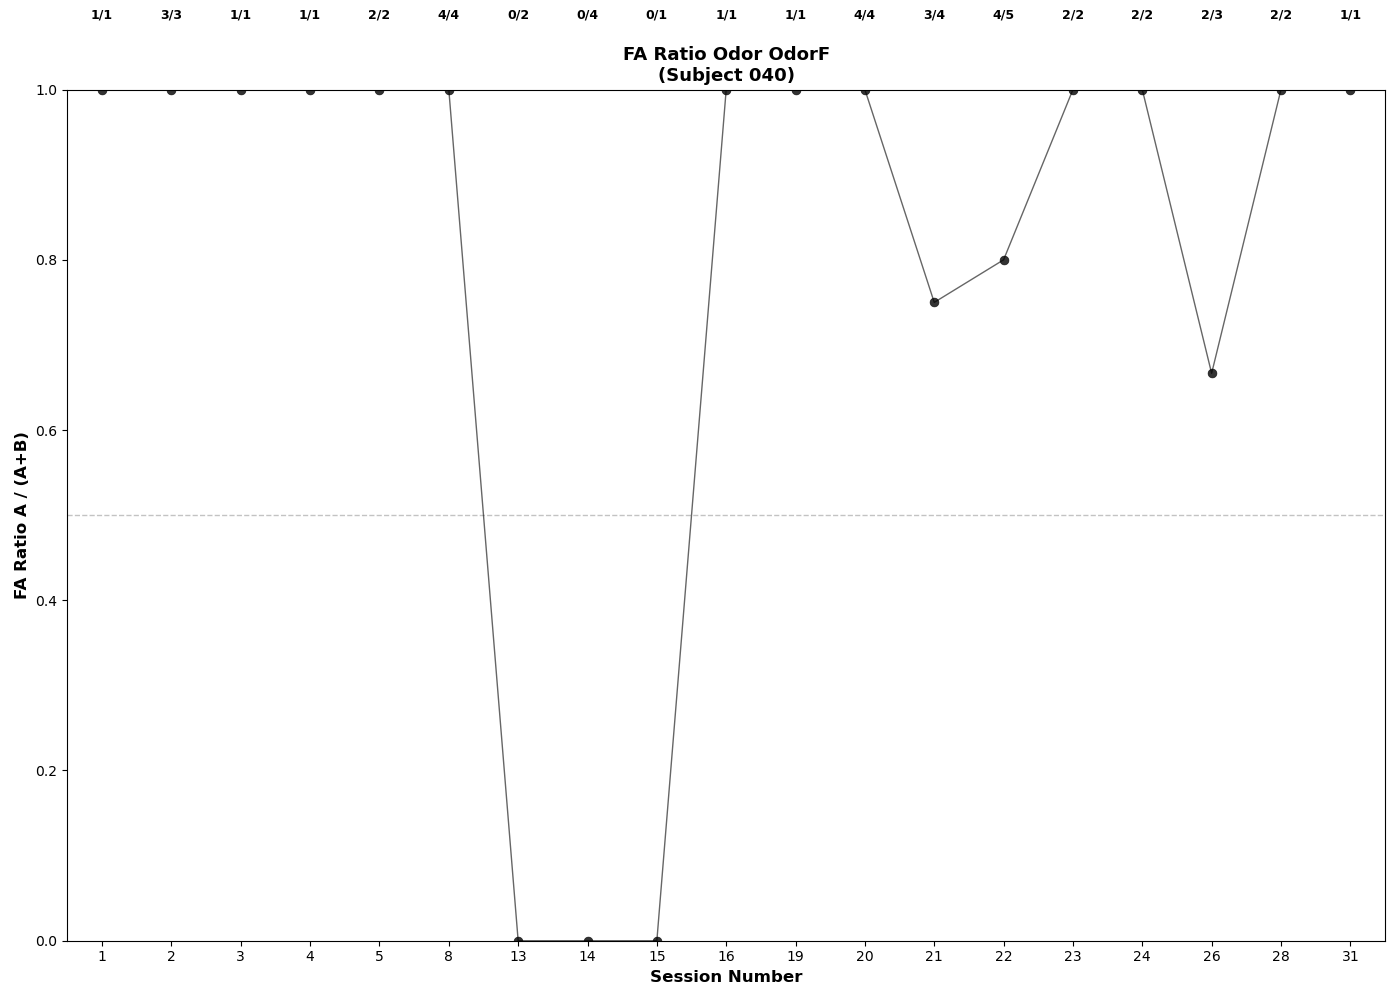

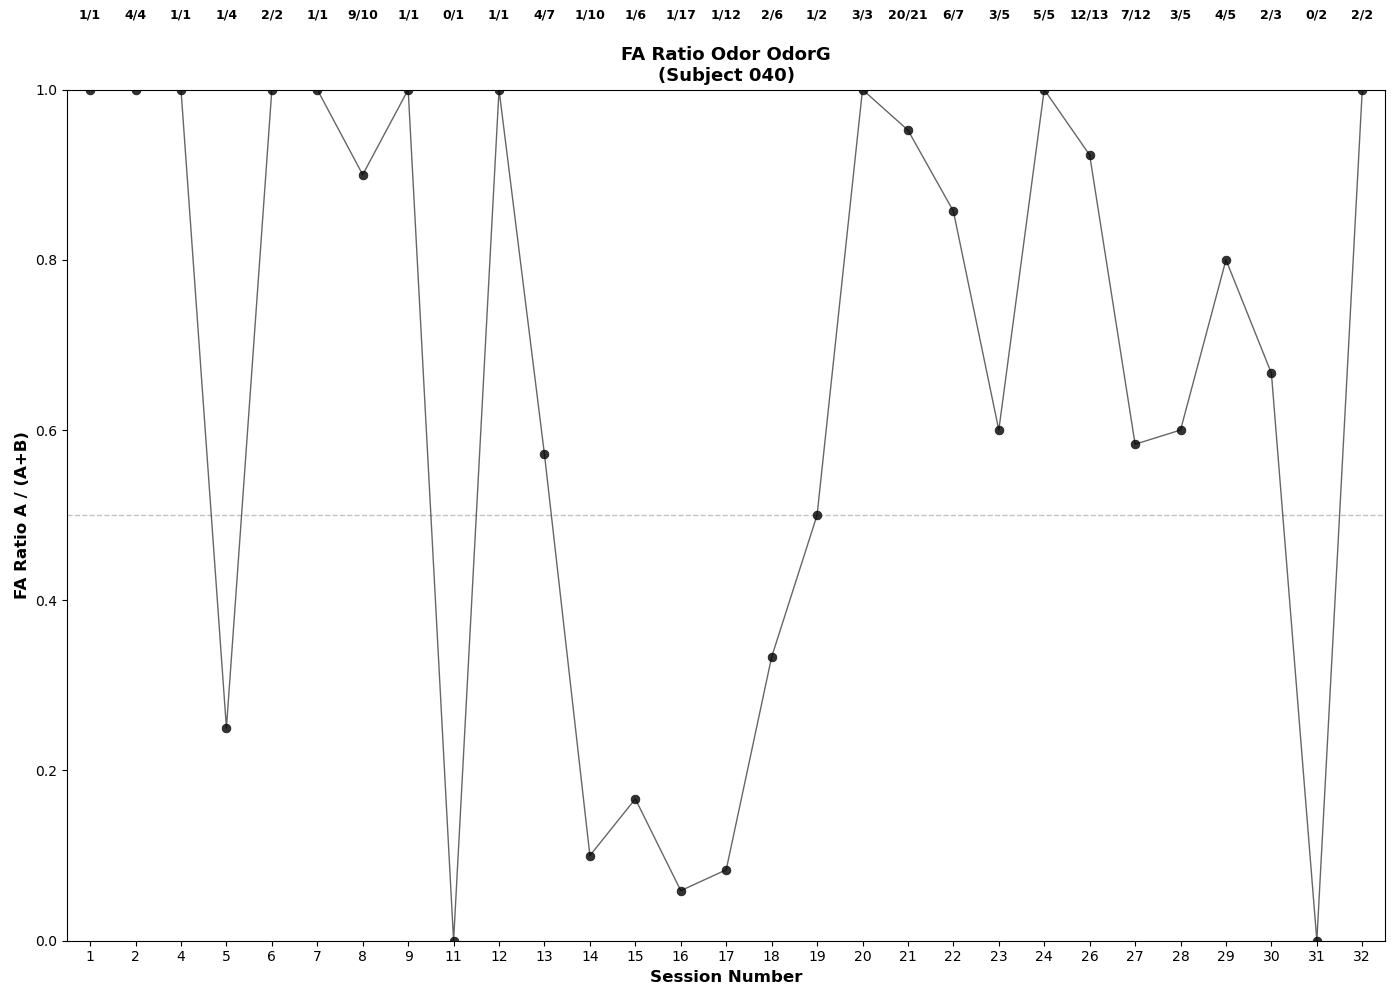

In [ ]:
# Per odor plots bias if FA are for port A or B
figs = plot_fa_ratio_a_over_sessions(subjid, dates=dates)

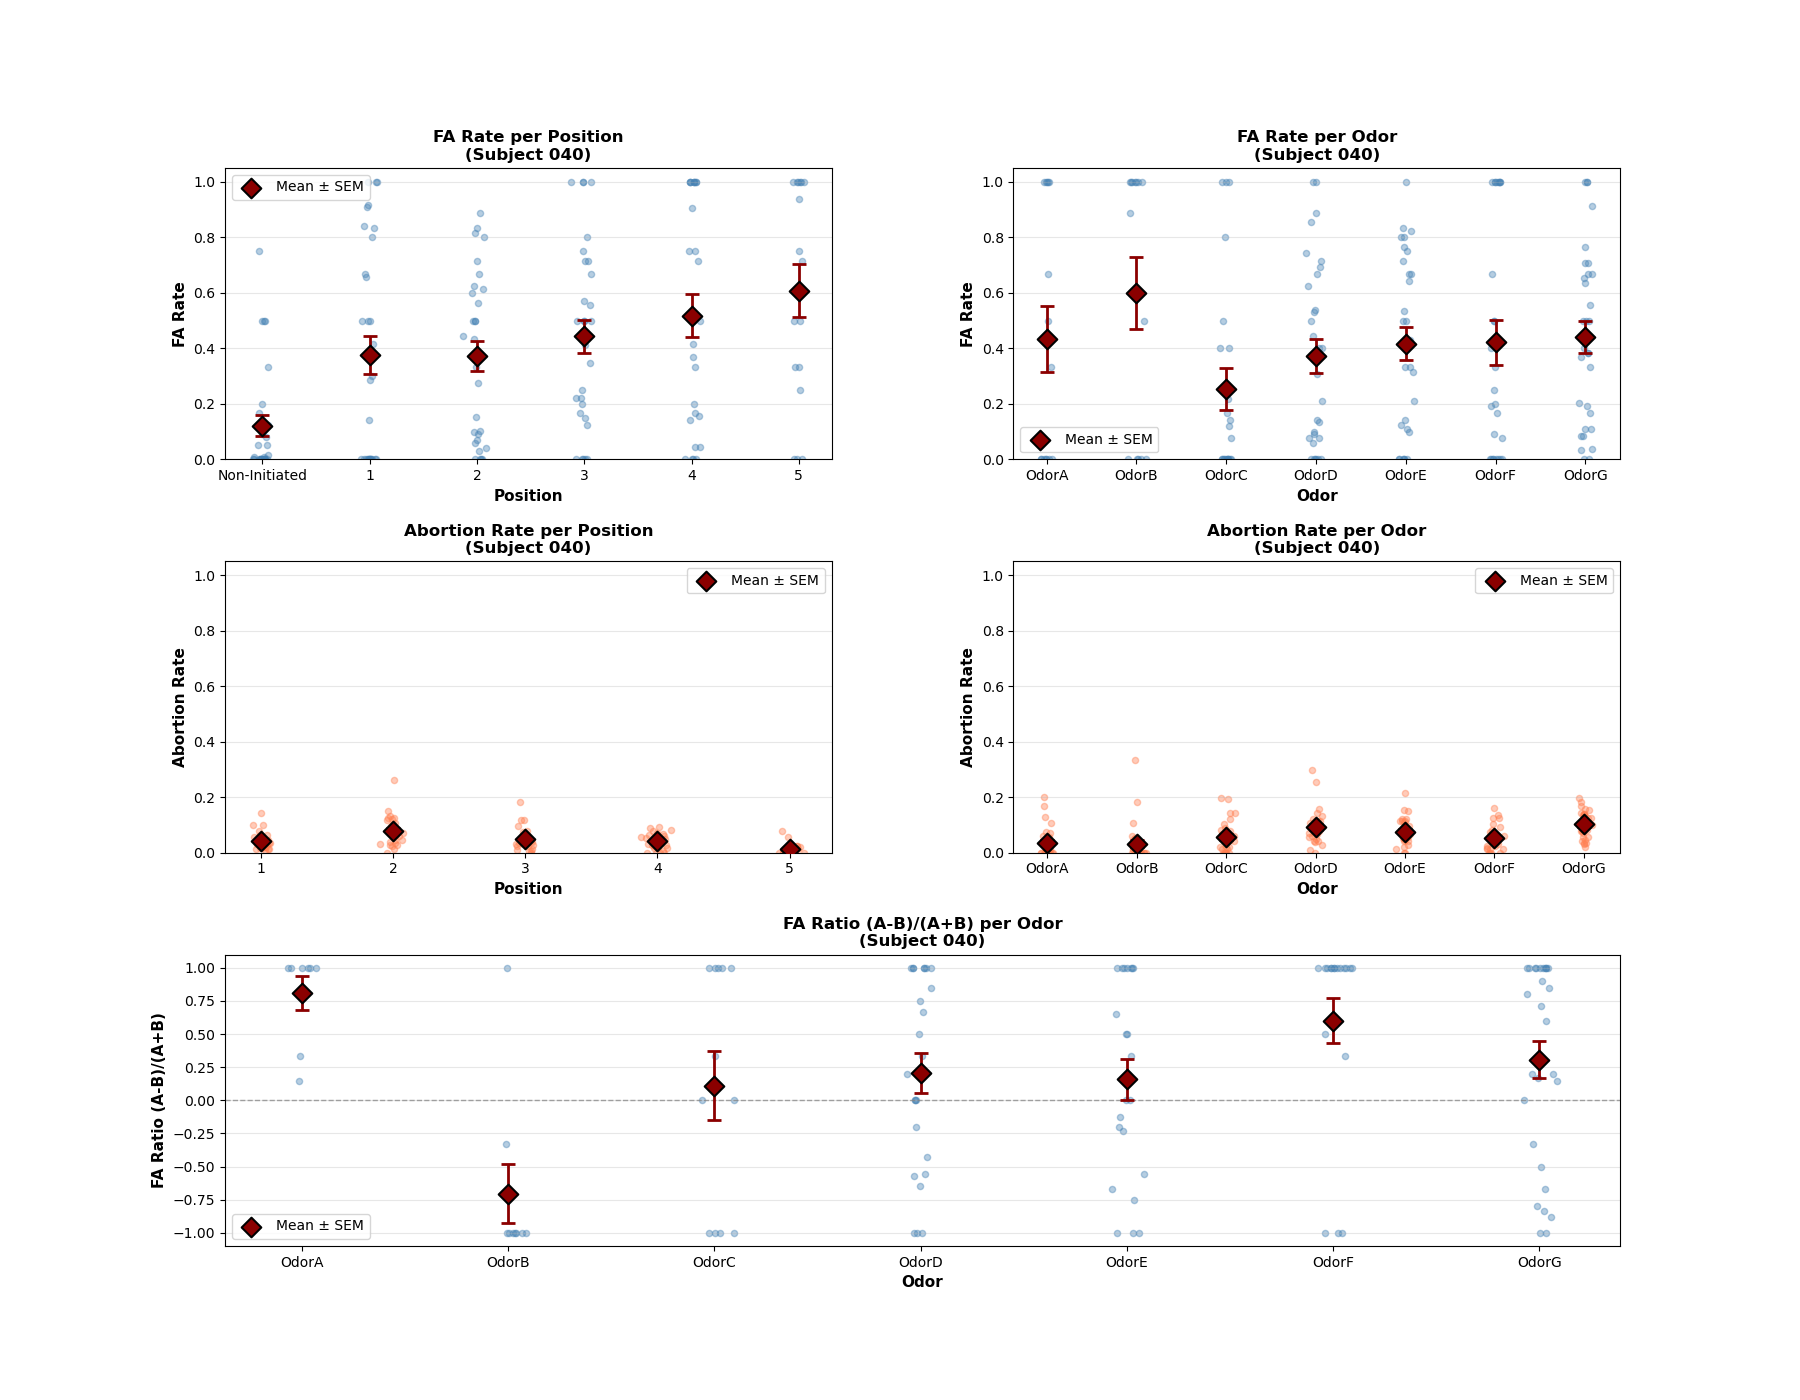

In [ ]:
# Plots Early Choice and Abortion rates as boxplots across sessions for each position and odor. Can set what FA types to include and whether to include non-initiated trials in FA. 
fig, axes = plot_abortion_and_fa_rates(subjid, dates=dates, include_noninitiated_in_fa_odor=False, fa_types='FA_time_in') #can use one or more FA Type filter, or 'All'. E.g., use 'FA_time_in,FA_time_out'


SUMMARY TABLE (SORTED BY METRIC, THEN BY RATIO)
Note: Only showing dates where FA data was found on HR trials (Subject 040)
    date              metric  port_a  port_b  total  ratio
20251121 OdorA - After OdorA       0       0      0    N/A
20251121    OdorA - On OdorA       0       0      0    N/A
20251121 OdorA - Total OdorA       1       0      1 +1.000
20251208 OdorC - After OdorC       0       4      4 -1.000
20251209 OdorC - After OdorC       0       1      1 -1.000
20251218 OdorC - After OdorC       0       1      1 -1.000
20251226 OdorC - After OdorC       0       1      1 -1.000
20251206 OdorC - After OdorC       2       4      6 -0.333
20251205 OdorC - After OdorC       2       1      3 +0.333
20251212 OdorC - After OdorC       1       0      1 +1.000
20251215 OdorC - After OdorC       1       0      1 +1.000
20251216 OdorC - After OdorC       1       0      1 +1.000
20251126 OdorC - After OdorC       0       0      0    N/A
20251127 OdorC - After OdorC       0       0     

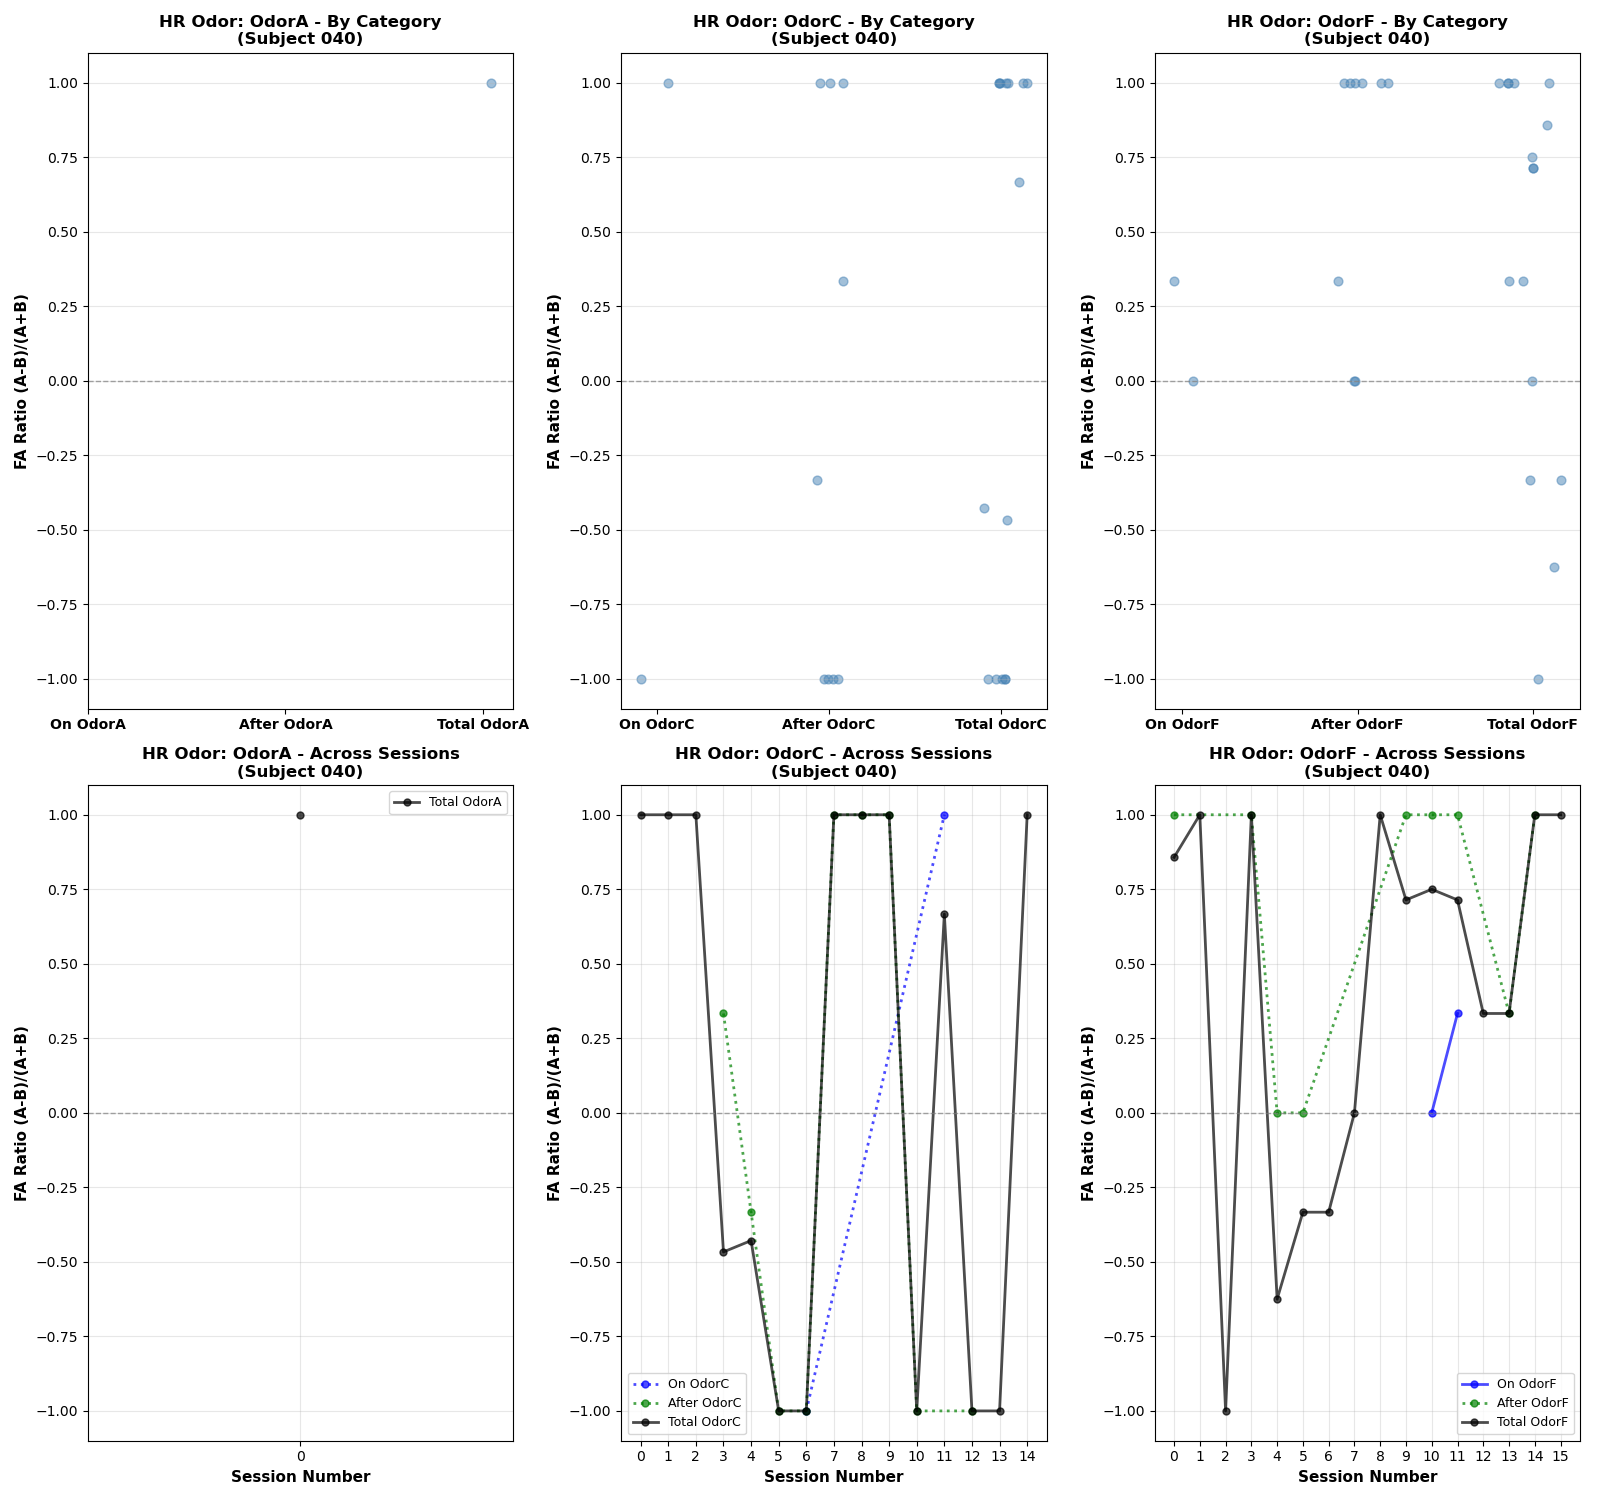

In [ ]:
# Plots if FAs are more often to reward port A or B for each odor, if FA is at that odor, one position after, or anywhere after. 
# Can filter by FA types: 'FA_time_in', 'FA_time_out', 'FA_late', or combinations like 'FA_time_in,FA_time_out'
# Can also exclude FAs at a specific position with exclude_last_pos=True (by default set to pos5, can be changed with last_odor_num=x)
fig, axes = plot_fa_ratio_by_hr_position(subjid, dates=dates, fa_types='FA_time_in', print_statistics=True, exclude_last_pos=True)



DEBUG: Data aggregated from 25 sessions on dates: [np.int64(20251121), np.int64(20251124), np.int64(20251125), np.int64(20251126), np.int64(20251127), np.int64(20251128), np.int64(20251201), np.int64(20251203), np.int64(20251204), np.int64(20251205), np.int64(20251206), np.int64(20251208), np.int64(20251209), np.int64(20251210), np.int64(20251211), np.int64(20251212), np.int64(20251215), np.int64(20251216), np.int64(20251217), np.int64(20251218), np.int64(20251222), np.int64(20251223), np.int64(20251226), np.int64(20251229), np.int64(20251230)]
DEBUG: Color mapping: [np.int64(20251121), np.int64(20251124), np.int64(20251125), np.int64(20251126), np.int64(20251127), np.int64(20251128), np.int64(20251201), np.int64(20251203), np.int64(20251204), np.int64(20251205), np.int64(20251206), np.int64(20251208), np.int64(20251209), np.int64(20251210), np.int64(20251211), np.int64(20251212), np.int64(20251215), np.int64(20251216), np.int64(20251217), np.int64(20251218), np.int64(20251222), np.in

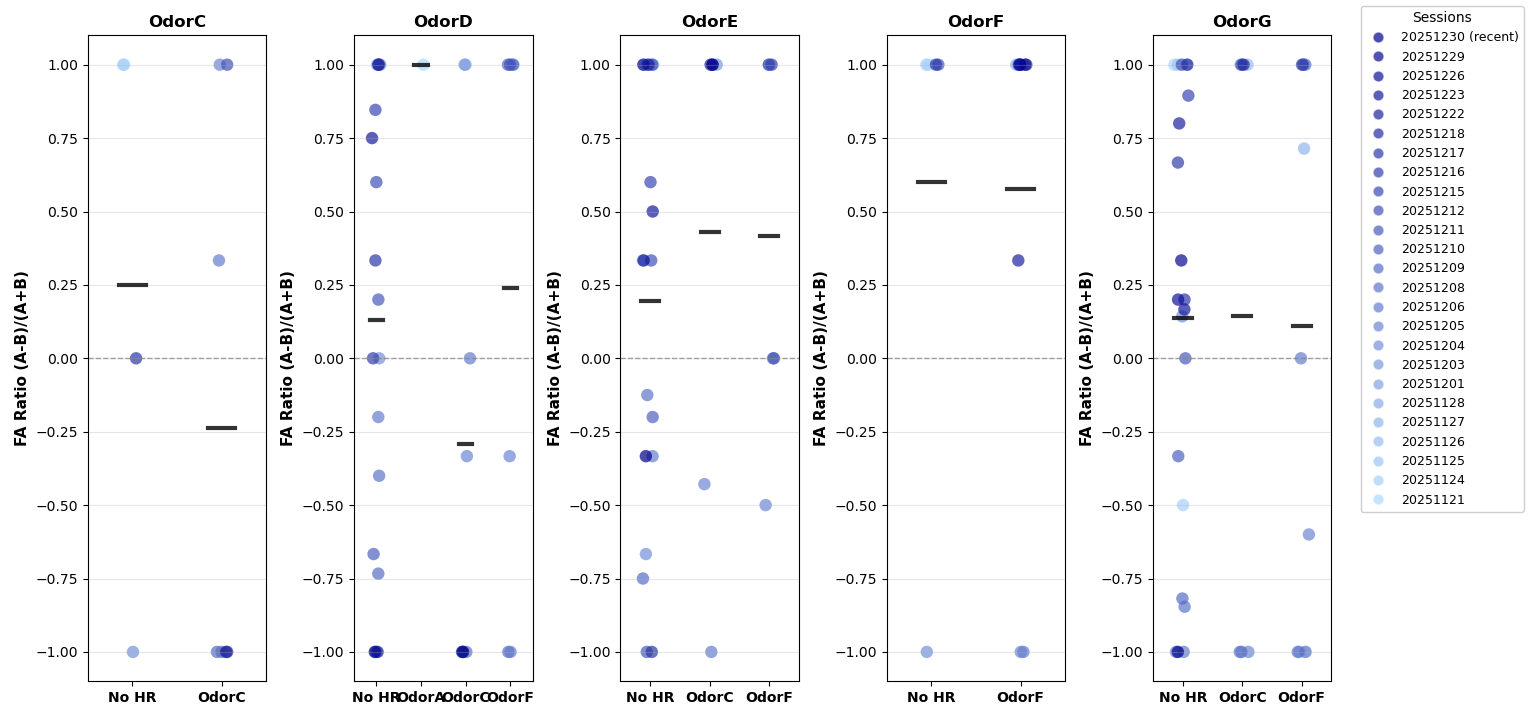

In [22]:
# Plot FA Ratio by Abortion Odor (comparing HR vs No HR trials)
# Shows FA distribution across aborted sequences grouped by the odor where abortion occurred
fig, axes = plot_fa_ratio_by_abort_odor(subjid, dates=dates, fa_types='FA_time_in')


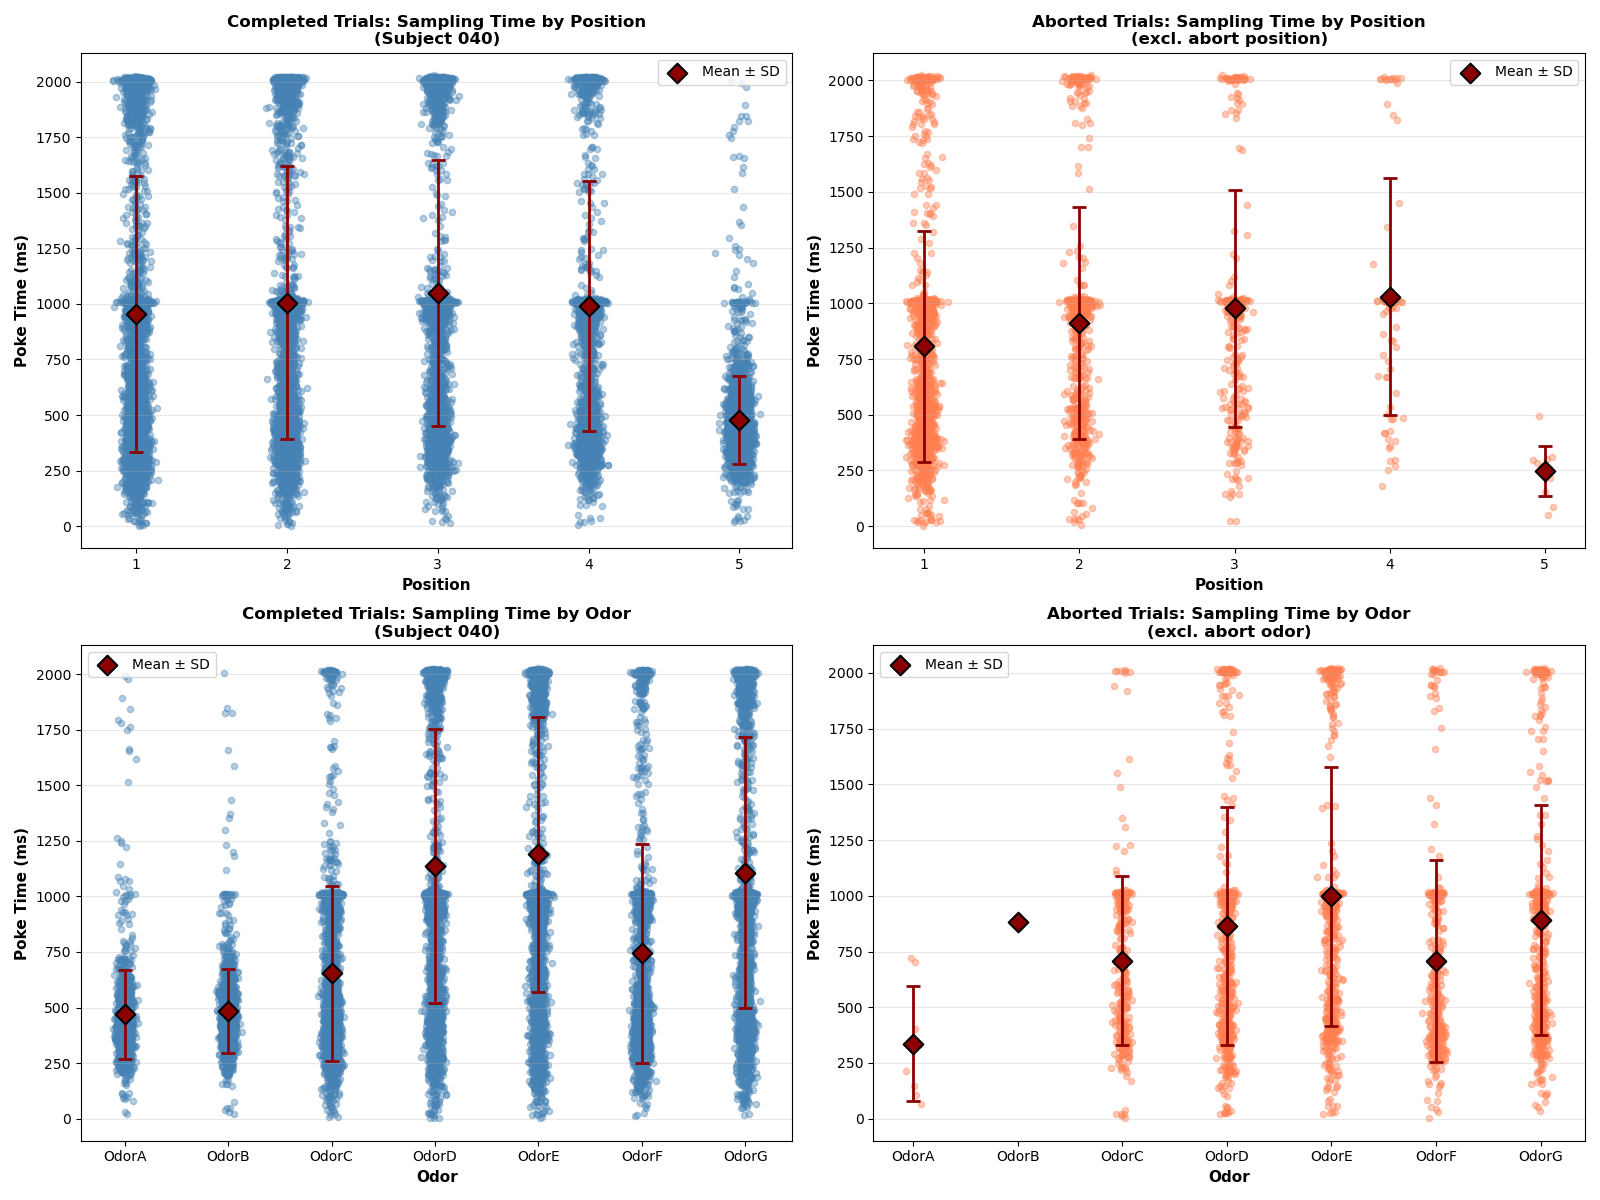

In [ ]:
# Plots boxplots of every sampling time across all sessions, sepearated by position and odor. For completed trials and aborted trials. 
fig, axes = plot_sampling_times_analysis(subjid, dates=dates)

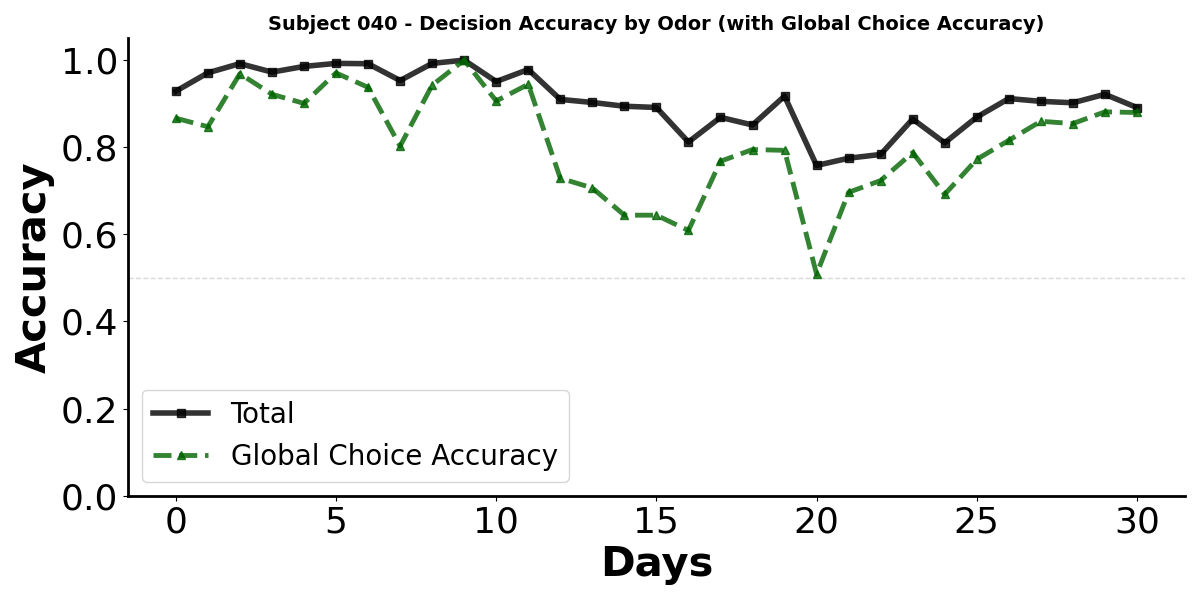

In [ ]:
# Plot decision accuracy, with option to plot accuracy for A and B and global choice accuracy. 
fig, ax = plot_decision_accuracy_by_odor(40, dates=(20251118, 20251231), plot_choice_acc=True, plot_AB=False)

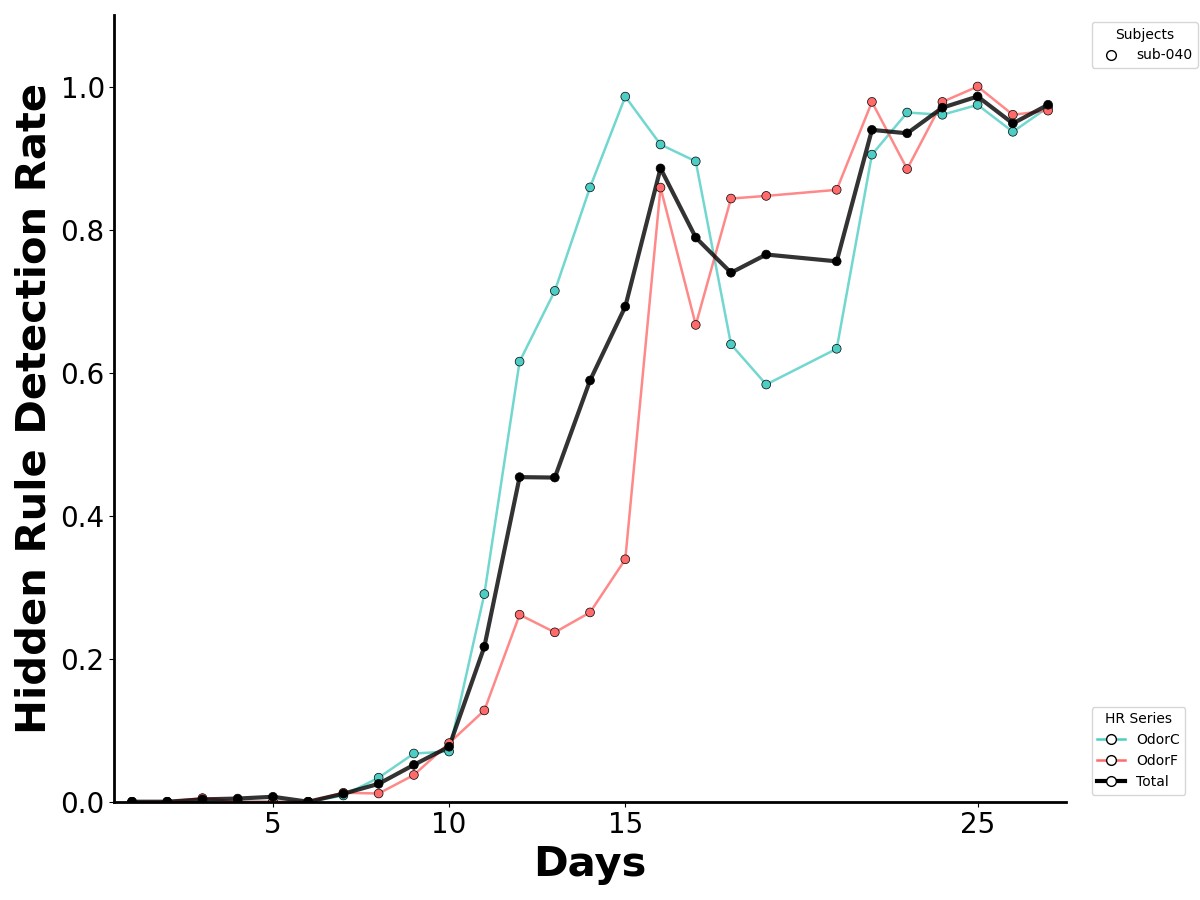

In [6]:
figs = plot_behavior_metrics(
    subjids=[40],
    dates=(20251125, 20251231),
    variables=[
        "hidden_rule_detection_rate",
    ],
    protocol_filter=None,
    compute_if_missing=False, 
    verbose=True, 
    black_white=True, 
    y_range=(0, 1.1), 
    plot_HR_separately=True, 
    show_title=False
)

# 2. Behavior / Movement analysis

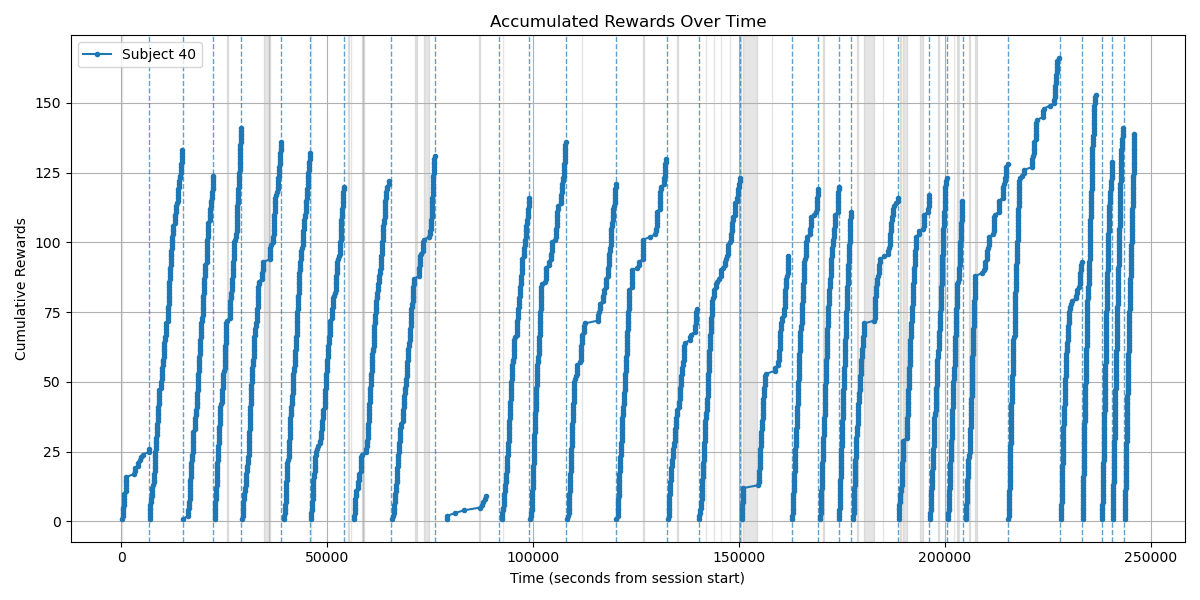

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Accumulated Rewards Over Time'}, xlabel='Time (seconds from session start)', ylabel='Cumulative Rewards'>)

In [16]:
# Plot cumulative rewards for multiple sessions and subjects. Can be split by days or consecutive. 
plot_cumulative_rewards(subjids=[subjid], dates=dates, split_days=True)

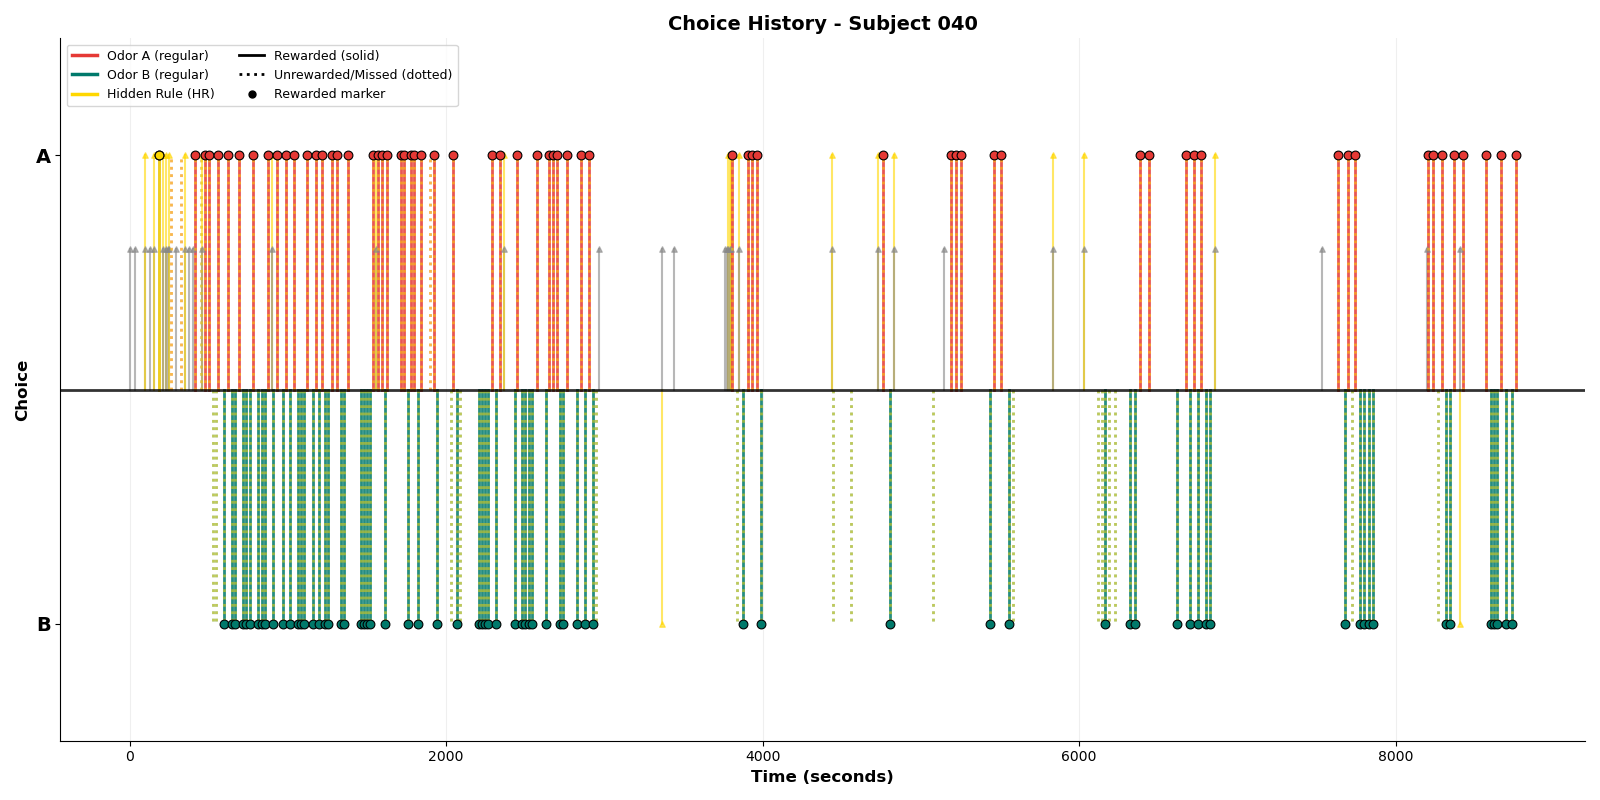

In [25]:
# Plots all choices for one or more sessions
choice_plots = plot_choice_history(subjid=40, dates=[20251203])

Loaded SLEAP tracking: 408887 frames from sub-040_ses-20251120_combined_sleap_tracking_timestamps.csv


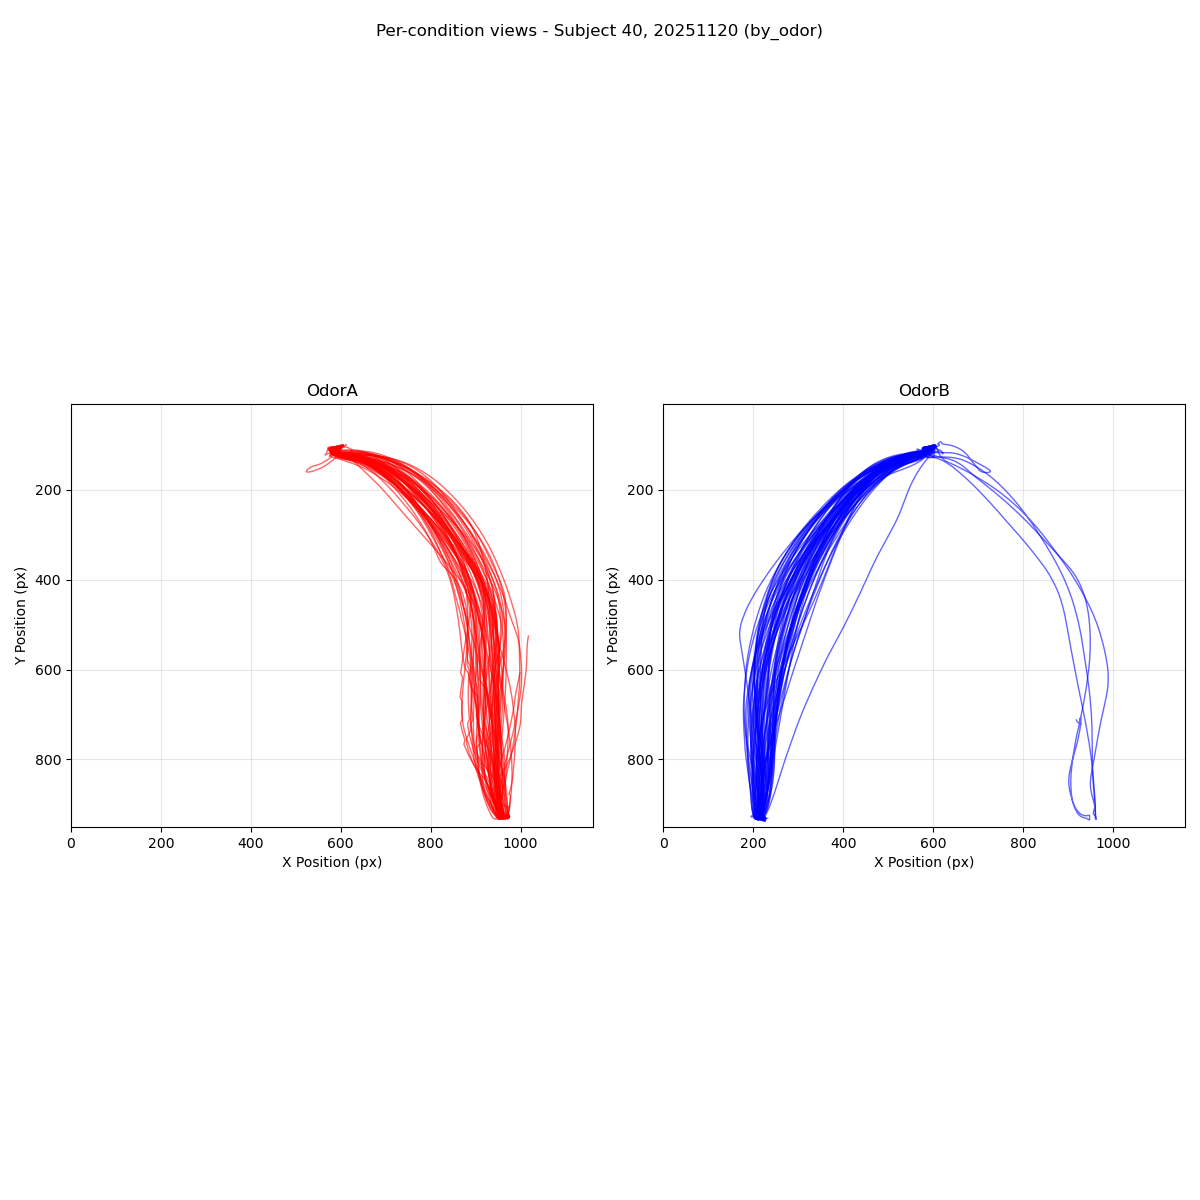

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Movement - Subject 40, 20251120 (by_odor)'}, xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

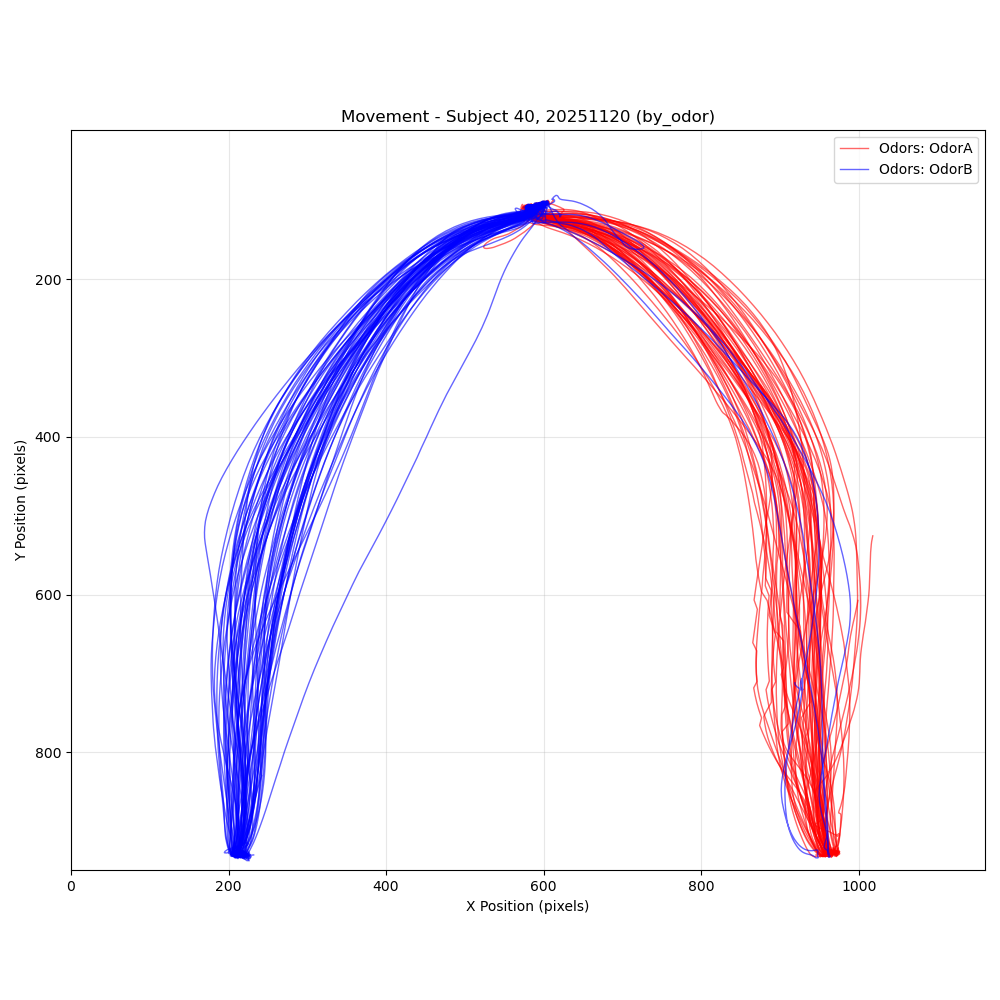

In [ ]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows), or trial_windows_rew
# for trial_windows: trial_windows=[(0, 20), (-20, None)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(40, 20251120, mode='by_odor', trial_windows=[(0, 10), (-10,None)], xlim=(100,1160), ylim=(10,950))


In [32]:
plt.close('all')

# Debugging
